# Toilet paper consumption problem

Imports and set magics:

In [298]:
import numpy as np
from scipy import stats as st
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import math as m
import time           
import seaborn as sns 

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

In this analysis, we wish to find the optimal consumption of toilet paper rolls for a consumer, here defined as the entire household. The initial amount of toilet paper is 10 rolls that needs to be split over an whole week. 

<b>Theory<b>

We consider an Euler Equation where the consumer preferences in each period, t, follows the condition: 
* $u(c_t)$ = $ln(c_t)$

The consumption in future periods is discounted with factor $β<1$
indicating the time-preference of the consumer.

The present value of the consumption path set in period 0 is given by:
* $V(c_0, c_1,..., c_T)$ = $\sum_{t=0}^T$ $\beta^t U(c_t)$

The consumer wishes to optimize his consumption for every period, $t=0, ..., T$ but for period $t+1$ the amount left to consume is smaller by the amount consumed the period before, given by

* $k_{t+1}$ = $k_t - c_t$

Therefore the following restriction must hold
* $k_t \geq 0$


# Analytical solution of the problem

######WRITE the analytical solution that we want to derive using **sympy** 


####$$ \tilde{k}^{\ast}= \frac{1}{(1+n)(1+g)}[sf(\tilde{k}^{\ast})+(1-\delta)\tilde{k}^{\ast}] $$

First we define all **symbols**:

In [299]:
t = 7
b = 0.7
k = np.zeros(t+1,float)
c = np.zeros(t+1,float)
u = np.zeros(t+1,float)
k[0] = 10  # k0
c[0] = (1.0-b)/(1.0-b**(t+1)) * k[0]  # c0
u[0] = np.log(c[0])

for i in range(1,t+1):
    #print "i=" + str(i)
    c[i] = beta * c[i-1]
    k[i] = k[i-1] - c[i-1]

    # Period utility with discounting
    u[i] = beta**(i-1)*np.log(c[i])

np.sum(u)  # total utility

print("c = " + str(c))
print("k = " + str(k))

c = [3.18352381 2.22846667 1.55992667 1.09194867 0.76436407 0.53505485
 0.37453839 0.26217688]
k = [10.          6.81647619  4.58800952  3.02808285  1.93613418  1.17177012
  0.63671527  0.26217688]


Next we **plot** the function

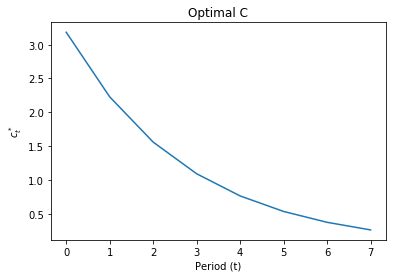

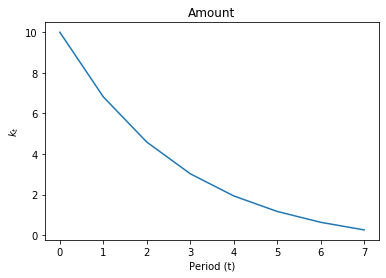

In [300]:
fig, ax = plt.subplots()
plt.subplots_adjust(wspace=0.5, hspace=0.8)
ax.plot(c, '')
ax.set_ylabel('$c^*_t$')
ax.set_xlabel('Period (t)')
ax.set_title('Optimal C')
plt.show()

fig, ax = plt.subplots()
plt.subplots_adjust(wspace=0.5, hspace=0.8)
ax.plot(k, '')
ax.set_ylabel('$k_t$')
ax.set_xlabel('Period (t)')
ax.set_title('Amount')
plt.show()

###WRITE SOMETHING ABOUT FINDINGS

## Numerical solution

The model is given by the utility function with one constraint

$\sum_{t=0}^T$ $\beta^t U(c_t)$ 

$c_0,...c_t = k_0$

Stating that it is not possible to consume more of the good than the 10 acquired goods. 


We now define the **utility function**:

In [301]:
def utility(c):
    t = len(c)
    u= np.zeros(t,float)
    for i in range(t):
        b = 0.7
        #Calculating the utility of the entire period, disregarding the discount factor
        u[i] = (b**i) * np.log(c[i])

#to maximize the result, we take the negative result
    return (-np.sum(u))

#We then define the constraint above as
def constraint(c):
    k[0] = 10
    x_1 = np.sum(c) - k[0]
    return np.array([x_1])

**Solve** by calling the optimizer:

In [302]:
#the function we want to maximize func1, the starting values for consumption in each period c0v and the constraints vector for each period constr1.

time = 10

#Now we initialize a guess for optimal c
c_guess = 0.3*np.ones(time,float)

#Using the optimizing function
c_op = optimize.fmin_slsqp(utility, c_guess, f_eqcons = constraint)

print(c_op)


Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.2914761304307483
            Iterations: 13
            Function evaluations: 157
            Gradient evaluations: 13
[3.08814661 2.15928281 1.51399323 1.05921944 0.74034874 0.51902058
 0.36328604 0.25423064 0.17795569 0.12451622]


Plotting the optimal consumtion of the period

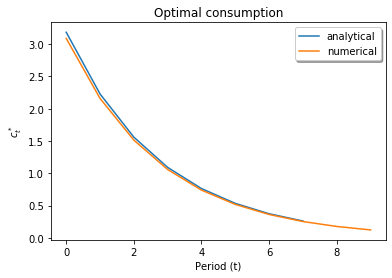

In [349]:
palette = sns.color_palette("mako_r", 6)
ax = sns.lineplot(data=c, hue="coherence", style="choice", palette=palette)
ax = sns.lineplot(data=c_op, hue="coherence", style="choice", palette=palette)
ax.set_title("Optimal consumption")
ax.set_xlabel("Period (t)")
ax.set_ylabel("$c^*_t$")
ax.legend(['analytical', 'numerical'], loc='best', shadow=True)
plt.show()


In [350]:

print('Analytic solution')
print('c = {}'.format(c))

print(' ')

print('Numeric solution')
print('c = {}'.format(c_op))


Analytic solution
c = [3.18352381 2.22846667 1.55992667 1.09194867 0.76436407 0.53505485
 0.37453839 0.26217688]
 
Numeric solution
c = [3.08814661 2.15928281 1.51399323 1.05921944 0.74034874 0.51902058
 0.36328604 0.25423064 0.17795569 0.12451622]


# Conclusion

ADD CONCISE CONCLUSION.